In [249]:
import config
import praw
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

Adding Comments to CSV

In [250]:
def process_comments(comments, csv_writer):
    for comment in comments:
        if isinstance(comment, praw.models.MoreComments):
            # Recursively process more comments
            process_comments(comment.comments(), csv_writer)
        else:
            cleaned_comment = comment_cleaning(comment.body)
            csv_writer.writerow([' '.join(cleaned_comment)])

Get Rid of Punctuation and Stopwords

In [251]:
def comment_cleaning(comment):
    punc_removed = [char for char in comment if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return punc_removed_join_clean

Doing the sentiment analysis on each comment

In [252]:
# Function to analyze sentiment
def analyze_sentiment(comment, model, tokenizer):
    encoded_comment = tokenizer(comment, return_tensors='pt', max_length=512, truncation=True)
    output = model(**encoded_comment)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_labels = {}
    
    for i in range(len(scores)):
        l = labels[i]
        s = scores[i]
        scores_labels[l] = s

    max_label = max(scores_labels, key=scores_labels.get)
    
    return max_label



RedditAPI Authentication

In [253]:
# First Code Snippet
user_agent = 'Testing PRAW and Reddit API'
reddit = praw.Reddit(client_id=config.ID,
                     client_secret=config.SECRET,
                     user_agent=user_agent)

SocceerAPI Authentication and URLs

In [254]:
import requests
import json

headers = {
	"X-RapidAPI-Key": "445088a04bmshf38acde11d7c250p13801fjsn7bb80ece68e1",
	"X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

url_team = "https://api-football-v1.p.rapidapi.com/v3/teams"
url_players = "https://api-football-v1.p.rapidapi.com/v3/players/squads"

Getting Input teams and Competition

In [255]:
querystring_first = {}
querystring_second = {}

first_team = input("First Team: ")
second_team = input("Second Team: ")
competition = input("Competition: ")

print(first_team, second_team)

querystring_first["name"] = first_team
querystring_second["name"] = second_team

print(querystring_first)


Real Madrid Barcelona
{'name': 'Real Madrid'}


Getting Requests from Soccer API

In [256]:
#Correct to the correct name later
first_data = requests.get(url_team, headers=headers, params=querystring_first)
secon_data = requests.get(url_team, headers=headers, params=querystring_second)

print(first_data.json())

{'get': 'teams', 'parameters': {'name': 'Real Madrid'}, 'errors': [], 'results': 1, 'paging': {'current': 1, 'total': 1}, 'response': [{'team': {'id': 541, 'name': 'Real Madrid', 'code': 'REA', 'country': 'Spain', 'founded': 1902, 'national': False, 'logo': 'https://media.api-sports.io/football/teams/541.png'}, 'venue': {'id': 1456, 'name': 'Estadio Santiago Bernabéu', 'address': 'Avenida de Concha Espina 1, Chamartín', 'city': 'Madrid', 'capacity': 85454, 'surface': 'grass', 'image': 'https://media.api-sports.io/football/venues/1456.png'}}]}


Converting request into JSON file

In [257]:
#Convert what I get into a json and save it as a file
import os

first_json = first_data.json()
second_json = secon_data.json()

# Specify relative file paths to the 'data' folder
folder_path = 'data'
first_json_file_path = os.path.join(folder_path, 'first_team_data.json')
second_json_file_path = os.path.join(folder_path, 'second_team_data.json')

# Create the 'data' folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the first JSON file
with open(first_json_file_path, 'w') as file:
    json.dump(first_json, file, indent=4)

# Save the second JSON file
with open(second_json_file_path, 'w') as file:
    json.dump(second_json, file, indent=4)


Getting Team IDs

In [258]:
#Extract the id from the jsons

first_id = first_json['response'][0]['team']['id']
second_id = second_json['response'][0]['team']['id']

print(first_id, second_id)

541 529


Getting Player List Information (all attributes)

In [259]:
#Use the id found to get the list of players for that team
querystring_first_team = {}
querystring_second_team = {}

querystring_first_team['team'] = first_id
querystring_second_team['team'] = second_id

print(querystring_first_team)
print(querystring_second_team)

first_team_players = requests.get(url_players, headers=headers, params=querystring_first_team)
second_team_players = requests.get(url_players, headers=headers, params=querystring_second_team)

print(first_team_players)

{'team': 541}
{'team': 529}
<Response [200]>


Convert these into JSON files

In [260]:
#Convert the players to a JSON and also save to a file
first_players_json = first_team_players.json()
second_players_json = second_team_players.json()


folder_path = 'data'
first_players_json_file_path = os.path.join(folder_path, 'first_team_players.json')
second_players_json_file_path = os.path.join(folder_path, 'second_team_players.json')

#COULD MAKE A FUNCTION HERE
with open(first_players_json_file_path, 'w') as file:
    json.dump(first_players_json, file, indent=4)

# Save the second JSON file
with open(second_players_json_file_path, 'w') as file:
    json.dump(second_players_json, file, indent=4)

print(json.dumps(first_players_json, indent=4))

{
    "get": "players/squads",
    "parameters": {
        "team": "541"
    },
    "errors": [],
    "results": 1,
    "paging": {
        "current": 1,
        "total": 1
    },
    "response": [
        {
            "team": {
                "id": 541,
                "name": "Real Madrid",
                "logo": "https://media.api-sports.io/football/teams/541.png"
            },
            "players": [
                {
                    "id": 730,
                    "name": "T. Courtois",
                    "age": 31,
                    "number": 1,
                    "position": "Goalkeeper",
                    "photo": "https://media.api-sports.io/football/players/730.png"
                },
                {
                    "id": 47400,
                    "name": "A. Lunin",
                    "age": 24,
                    "number": 13,
                    "position": "Goalkeeper",
                    "photo": "https://media.api-sports.io/football/players/47400

Get Only players and Extract into list

In [261]:
#Extract all the players from each team
first_players_list = first_players_json['response'][0]['players']
second_players_list = second_players_json['response'][0]['players']

print(first_players_list)

[{'id': 730, 'name': 'T. Courtois', 'age': 31, 'number': 1, 'position': 'Goalkeeper', 'photo': 'https://media.api-sports.io/football/players/730.png'}, {'id': 47400, 'name': 'A. Lunin', 'age': 24, 'number': 13, 'position': 'Goalkeeper', 'photo': 'https://media.api-sports.io/football/players/47400.png'}, {'id': 2273, 'name': 'Kepa', 'age': 29, 'number': 25, 'position': 'Goalkeeper', 'photo': 'https://media.api-sports.io/football/players/2273.png'}, {'id': 334575, 'name': 'Diego Piñeiro', 'age': 19, 'number': 26, 'position': 'Goalkeeper', 'photo': 'https://media.api-sports.io/football/players/334575.png'}, {'id': 396475, 'name': 'Fran González', 'age': 18, 'number': 30, 'position': 'Goalkeeper', 'photo': 'https://media.api-sports.io/football/players/396475.png'}, {'id': 206260, 'name': 'Lucas Cañizares', 'age': 21, 'number': 31, 'position': 'Goalkeeper', 'photo': 'https://media.api-sports.io/football/players/206260.png'}, {'id': 733, 'name': 'Dani Carvajal', 'age': 31, 'number': 2, 'posi

In [262]:
#COULD MAKE A FUNCTION HERE 

first_players_extracted = []
second_players_extracted = []
for player in first_players_list:
    first_players_extracted.append(player['name'])

for player in second_players_list:
    second_players_extracted.append(player['name'])

print(first_players_extracted)
print(second_players_extracted)

['T. Courtois', 'A. Lunin', 'Kepa', 'Diego Piñeiro', 'Fran González', 'Lucas Cañizares', 'Dani Carvajal', 'Éder Militão', 'D. Alaba', 'Nacho', 'Fran García', 'A. Rüdiger', 'F. Mendy', 'Álvaro Carrillo', 'Vinícius Tobias', 'J. Bellingham', 'T. Kroos', 'L. Modrić', 'E. Camavinga', 'F. Valverde', 'Lucas Vázquez', 'A. Tchouaméni', 'Dani Ceballos', 'Brahim Díaz', 'A. Güler', 'Mario Martín', 'N. Paz', 'Vinícius Júnior', 'Rodrygo', 'Joselu', 'Gonzalo García']
['M. ter Stegen', 'Iñaki Peña', 'Ander Astralaga', 'D. Kochen', 'Á. Yaakobishvili', 'João Cancelo', 'Alejandro Balde', 'R. Araújo', 'Íñigo Martínez', 'A. Christensen', 'Marcos Alonso', 'Sergi Roberto', 'J. Koundé', 'Pau Cubarsí Paredes', 'Héctor Fort', 'M. Faye', 'Gavi', 'Pedri', 'Oriol Romeu', 'F. de Jong', 'İ. Gündoğan', 'Ángel Alarcón', 'Marc Casadó', 'Fermín', 'Aleix Garrido', 'Unai Hernández', 'Pau Prim', 'Ferran Torres', 'R. Lewandowski', 'Raphinha', 'João Félix', 'Vitor Roque', 'Lamine Yamal', 'Pau Victor', 'Marc Guiu']


Filtering List of Players (May not have to do this)

In [263]:
#COULD MAKE A FUCNTION HERE

first_players_filter = []
second_players_filter = []

for player in first_players_extracted:
    spt = player.split(' ')
    for name in spt:
        first_players_filter.append(name)

for player in second_players_extracted:
    spt = player.split(' ')
    for name in spt:
        second_players_filter.append(name)
        
print(first_players_filter)
print(second_players_filter)
    

['T.', 'Courtois', 'A.', 'Lunin', 'Kepa', 'Diego', 'Piñeiro', 'Fran', 'González', 'Lucas', 'Cañizares', 'Dani', 'Carvajal', 'Éder', 'Militão', 'D.', 'Alaba', 'Nacho', 'Fran', 'García', 'A.', 'Rüdiger', 'F.', 'Mendy', 'Álvaro', 'Carrillo', 'Vinícius', 'Tobias', 'J.', 'Bellingham', 'T.', 'Kroos', 'L.', 'Modrić', 'E.', 'Camavinga', 'F.', 'Valverde', 'Lucas', 'Vázquez', 'A.', 'Tchouaméni', 'Dani', 'Ceballos', 'Brahim', 'Díaz', 'A.', 'Güler', 'Mario', 'Martín', 'N.', 'Paz', 'Vinícius', 'Júnior', 'Rodrygo', 'Joselu', 'Gonzalo', 'García']
['M.', 'ter', 'Stegen', 'Iñaki', 'Peña', 'Ander', 'Astralaga', 'D.', 'Kochen', 'Á.', 'Yaakobishvili', 'João', 'Cancelo', 'Alejandro', 'Balde', 'R.', 'Araújo', 'Íñigo', 'Martínez', 'A.', 'Christensen', 'Marcos', 'Alonso', 'Sergi', 'Roberto', 'J.', 'Koundé', 'Pau', 'Cubarsí', 'Paredes', 'Héctor', 'Fort', 'M.', 'Faye', 'Gavi', 'Pedri', 'Oriol', 'Romeu', 'F.', 'de', 'Jong', 'İ.', 'Gündoğan', 'Ángel', 'Alarcón', 'Marc', 'Casadó', 'Fermín', 'Aleix', 'Garrido', 'U

Getting the Reddit Post

In [264]:
# Specify the subreddit and keywords
subreddit_name = 'soccer'
#keywords = ['Real Madrid', 'Barcelona', 'Spanish Supercopa']
keywords = [first_team, second_team, competition]

# Search for posts containing the specified keywords in the title
search_query = ' '.join(keywords)
subreddit = reddit.subreddit(subreddit_name)
search_results = subreddit.search(search_query, sort='relevance', limit=1)

Saving Comments to a CSV

In [265]:
csv_file_path = 'data/comments_data.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Comment Body'])

    for post in search_results:
        post_id = post.id
        print(f"Found post: {post.title} (ID: {post_id})")

        # Extract comments and write to CSV
        submission = reddit.submission(id=post_id)
        comments = submission.comments.list()
        process_comments(comments, csv_writer)



    print(f"Comments saved to {csv_file_path}")

Found post: Post Match Thread: Real Madrid 4-1 Barcelona | Spanish Supercopa (ID: 196pxbn)
Comments saved to data/comments_data.csv


Getting Punctuation and Stopwords libraries

In [266]:
import string
import nltk

#List of stopwods
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/leo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading the CSV

In [267]:
# Second Code Snippet
csv_file_path = 'data/comments_data.csv'
with open(csv_file_path, 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Skip the header row
    next(csv_reader)
    
    comments = []
    for index, row in enumerate(csv_reader):
        comments.append(row[0])

print(len(comments))

674


Splitting Comments into respective teams

In [268]:
first_team_comments = []
second_team_comments = []
neutrals = []


for comment in comments:
    comment_split = comment.split(' ')
    added_comment = False
    for word in comment_split:
        if word in first_players_filter or word is first_team:
            first_team_comments.append(comment)
            added_comment = True
            break
        elif word in second_players_filter or word is second_team:
            second_team_comments.append(comment)
            added_comment = True
            break
    
    if added_comment:
        added_comment = False
    else:
        neutrals.append(comment)


In [269]:
print(len(first_team_comments))
print(len(second_team_comments))
print(first_team_comments)
print(second_team_comments)

44
49
['huge respect Xavi staying Real Madrids celebration applauding coaches mightve binned medal walked straight dressing room high line vs Rodrygo Vinicius failed quick 20 complicated game 21 Real Madrid threatening every time went Comfortable without ball Barça uncomfortable without little threat Joao Felix little imagination got gameplan shut pressure Frenkie impossible get ball dont bite situation let Barça play ball around mostly sidelines Vini Rodrygo Bellingham ball vs Barça get shut vs Atleti reason game Thursday complicated theres one team eager shut spirits Atleti calls bench Vini Brahim typical Today man showed dont cant wait CL knockouts come around see best', 'Carvajal insane past months Back one best RBs world', 'Fede Valverde Horse never seems tire Sometimes performances overlooked hes menace', 'Thing real side almost impossible team control centre park players like valverde Bellingham tchouameni camavinga kroos modric team everything physicality experience skill stami

In [270]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']


In [271]:
# Sentiment analysis using threading
#from multiprocessing.pool import ThreadPool
#from functools import partial


#analyze_sentiment_partial = partial(analyze_sentiment, model=model, tokenizer=tokenizer)


#pool = ThreadPool()
#sentiments = pool.map(analyze_sentiment_partial, comments)

#pool.close()
#pool.join()

In [272]:
from multiprocessing.pool import ThreadPool
from functools import partial

analyze_sentiment_partial = partial(analyze_sentiment, model=model, tokenizer=tokenizer)


pool = ThreadPool()
first_team_sentiment = pool.map(analyze_sentiment_partial, first_team_comments)

pool.close()
pool.join()

In [273]:
pool = ThreadPool()
second_team_sentiment = pool.map(analyze_sentiment_partial, second_team_comments)

pool.close()
pool.join()

In [274]:
#positive_length = sentiments.count('Positive')
#negative_length = sentiments.count('Negative')
#neutral_length = sentiments.count('Neutral')

#print(positive_length, negative_length, neutral_length)

#categories = ['Positive', 'Negative', 'Neutral']
#lengths = [positive_length, negative_length, neutral_length]

In [275]:
# FOR A SPECIFIC TEAM
first_positive_length = first_team_sentiment.count('Positive')
first_negative_length = first_team_sentiment.count('Negative')
first_neutral_length = first_team_sentiment.count('Neutral')

print(first_positive_length, first_negative_length, first_neutral_length)

categories = ['Positive', 'Negative']
first_lengths = [first_positive_length, first_negative_length]

13 4 27


In [276]:
# FOR A SPECIFIC TEAM
second_positive_length = second_team_sentiment.count('Positive')
second_negative_length = second_team_sentiment.count('Negative')
second_neutral_length = second_team_sentiment.count('Neutral')

print(second_positive_length, second_negative_length, second_neutral_length)

categories = ['Positive', 'Negative']
second_lengths = [second_positive_length, second_negative_length]

4 14 31


In [277]:
#plt.bar(categories, lengths, color=['green', 'red'])
#plt.xlabel('Sentiment')
#plt.ylabel('Length')
#plt.title('Length of Lists by Sentiment')
#plt.show()

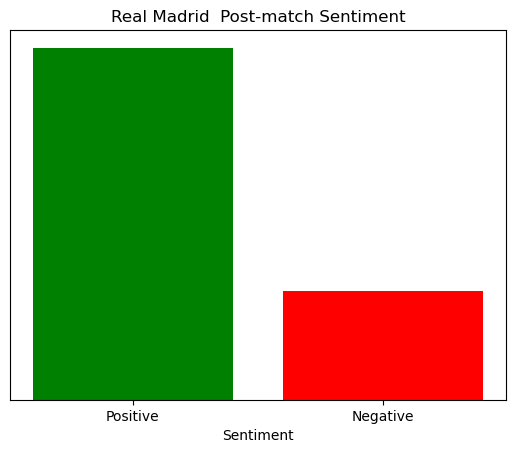

In [278]:
#FOR A SPECIFIC TEAM
plt.bar(categories, first_lengths, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.yticks([])
plt.title(first_team + "  Post-match Sentiment")
plt.show()

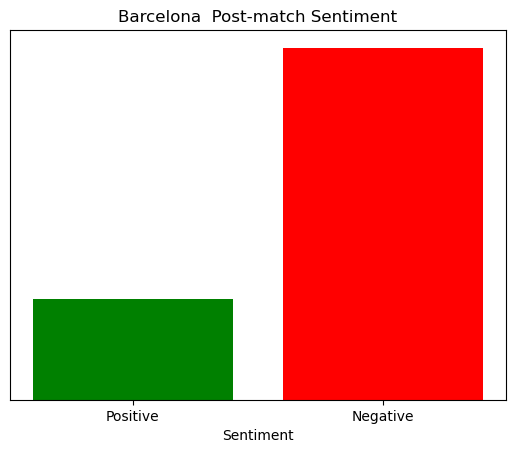

In [279]:
#FOR A SPECIFIC TEAM
plt.bar(categories, second_lengths, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.yticks([])
plt.title(second_team + "  Post-match Sentiment")
plt.show()